# Recognizing 7 seg digit
### input are values of 7 segments of the digital display. output is a class of the number shown

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical

from IPython.display import SVG
from keras.utils.visualize_util import plot
from keras.utils.visualize_util import model_to_dot

Using Theano backend.


input and output data

In [2]:
zer = [1,1,1,1,1,1,0]
one = [0,1,1,0,0,0,0]
two = [1,1,0,1,1,0,1]
thr = [1,1,1,1,0,0,1]
fou = [0,1,1,0,0,1,1]
fiv = [1,0,1,1,0,1,1]
six = [1,0,1,1,1,1,1]
sev = [1,1,1,0,0,0,0]
eig = [1,1,1,1,1,1,1]
nin = [1,1,1,1,0,1,1]
eij = [1,1,1,0,1,1,1] #A
see = [1,0,0,1,1,1,0] #C
eee = [1,0,0,1,1,1,1] #E
inp=[zer, one, two, thr, fou, fiv, six, sev, eig, nin, eij, see, eee]
out=[[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,1,0,0],[1,1,1,0]]
rout=[0,1,2,3,4,5,6,7,8,9,10,11,12]
out = to_categorical(rout, nb_classes=13)
print(out)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


NN model

In [3]:
model = Sequential()
l1=Dense(output_dim=7, input_dim=7)
model.add(l1)
model.add(Activation("relu"))
l2=Dense(output_dim=13)
model.add(l2)
model.add(Activation("softmax"))
#model.add(BatchNormalization())
#model.add(model.add(lambda(rectifier)))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.compile(loss='mse', optimizer='adagrad', metrics=['accuracy'])
#model.compile(loss='mse',optimizer='sgd', metrics=['accuracy'])

plot(model, to_file='model_categorical.png',show_shapes=True)
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

train

In [4]:
epochs=1000
hist=model.fit(inp, out, nb_epoch=epochs, batch_size=13, verbose=0, shuffle=True)


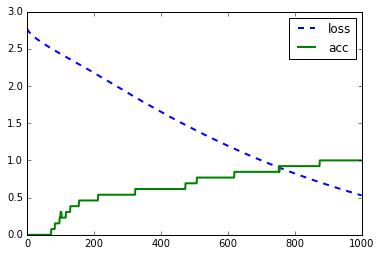

In [19]:
#print(hist.history)
x = np.linspace(0,epochs-1,epochs)
plt.plot(x, hist.history['loss'], '--', linewidth=2, label='loss')
plt.plot(x, hist.history['acc'], '-', linewidth=2, label='acc')
plt.legend()
plt.show()

check results

In [20]:
loss_and_metrics = model.evaluate(inp, out, batch_size=13)
loss_and_metrics

13/13 [==============================] - 0s


[0.528248131275177, 1.0]

check the layers

In [21]:
l1.get_weights()
l2.get_weights()

[array([[ 1.01535344,  0.7550981 , -0.32547379,  1.06790793,  0.53175503,
         -0.74852872, -1.09260523,  0.95602643,  0.48050079,  1.122347  ,
          0.64127523, -0.87985516, -1.02774441],
        [-1.04177976, -0.63635498,  1.50901413,  0.59177482, -1.27203143,
         -0.98152977, -0.73689598,  1.22145557,  0.01439504, -0.66432673,
          0.59706849, -1.27208507, -0.09192861],
        [-0.45069113, -0.44283745,  0.45974344, -0.03177766,  0.1796684 ,
          0.14814669,  0.00608478,  0.12320038,  0.29995894,  0.37128767,
          0.24872376,  0.00265727,  0.54229218],
        [ 0.83290505, -1.11127138,  0.45828953, -0.54648447, -1.19264925,
          0.03527959,  0.7233178 , -1.29916048,  0.5241158 , -0.32995307,
         -1.46433485,  1.33831239,  1.29923773],
        [-0.62497795, -1.09605718, -1.04133022, -0.84242874,  0.79389769,
          1.20935476,  0.56719244, -1.41509891,  0.38834837,  0.62725043,
          1.27669346, -1.21262848, -0.17687686],
        [-1.379

In [22]:
#proba = model.predict_proba(inp, batch_size=10)
pred = model.predict(inp, batch_size=13)

In [23]:
for co,i in enumerate(pred):
    c=[]
    for j in i:
        if j>0.5: c.append(1)
        else: c.append(0)
    print(i,c, out[co])

[  6.32474780e-01   8.45323899e-04   1.51356785e-02   3.58849019e-02
   6.38338388e-04   5.28327981e-03   1.71274450e-02   5.85585134e-04
   1.45672962e-01   6.22517467e-02   1.21478701e-03   4.70400900e-02
   3.58450562e-02] [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  4.39998577e-04   7.81950116e-01   3.97018921e-05   6.35334197e-03
   6.76913038e-02   4.94533597e-05   1.58848543e-05   1.40562266e-01
   3.36176221e-04   2.17678025e-03   3.08674818e-04   5.41611989e-05
   2.21511491e-05] [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  4.70544910e-03   9.25833592e-05   8.89038563e-01   6.00670688e-02
   2.35000539e-06   5.23557646e-05   6.26025139e-04   1.56292785e-02
   1.49955377e-02   6.20038598e-04   5.85104688e-04   1.31589302e-03
   1.22697782e-02] [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.02957039  0.01096249  0.05506318  0.